# Exercício 22
Discretizar atributo numérico que possui os valores abaixo em 3 intervalos

n = [0,1,2,6,6,10,10,10,13,16,17,18,20,20,21,21,25]

Usar 
- larguras iguais
- frequências iguais
- inspeção visual

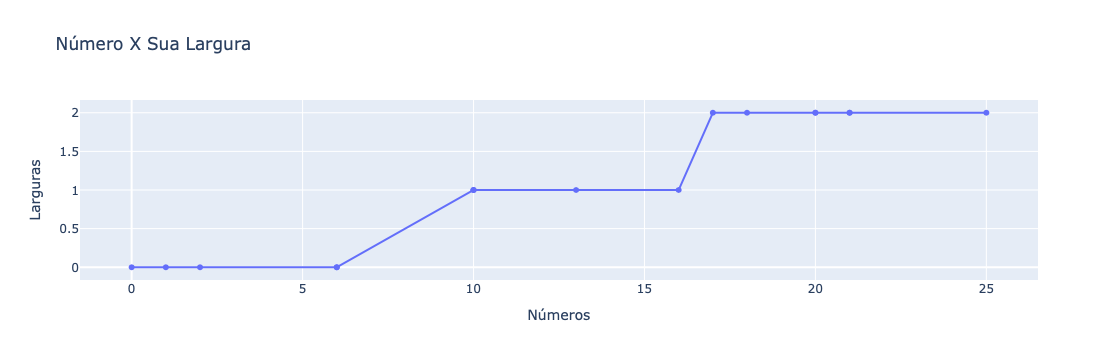

In [12]:
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

data = [0,1,2,6,6,10,10,10,13,16,17,18,20,20,21,21,25]
df = pd.DataFrame({'numero': data})
discretizer = KBinsDiscretizer(n_bins= 3, encode='ordinal', strategy='uniform')

data_discretized = discretizer.fit_transform(np.array(data).reshape(-1, 1))
df['largura'] = data_discretized
df

px.line(df, x='numero', y='largura', title='Número X Sua Largura', markers=True, labels={
  'numero': 'Números',
  'largura': 'Larguras'
})

## Normalize o atributo Rendimentos utilizando Re-escala [0,1].

In [13]:
df_values = pd.read_csv('../exercicio_23_mini_boss/credit_scoring_eng.csv')
df_values.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,1.935100e+04
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,1.674223e+05
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,1.029716e+05
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,1.030532e+05
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,1.450179e+05
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,2.034351e+05
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,2.265604e+06


In [14]:
df_values

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,masters degree,0,married,0,F,employee,0,253875.639453,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,112080.014102,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,145885.952297,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,267628.550329,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,158616.077870,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,-4529.316663,43,secondary education,1,civil partnership,1,F,partner,0,224791.862382,housing transactions
21521,0,343937.404131,67,secondary education,1,married,0,F,retiree,0,155999.806512,purchase of a car
21522,1,-2113.346888,38,secondary education,1,civil partnership,1,M,employee,1,89672.561153,property
21523,3,-3112.481705,38,secondary education,1,married,0,M,employee,1,244093.050500,buying my own car


In [15]:
test = df_values.dropna()
test

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,masters degree,0,married,0,F,employee,0,253875.639453,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,112080.014102,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,145885.952297,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,267628.550329,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,158616.077870,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,-4529.316663,43,secondary education,1,civil partnership,1,F,partner,0,224791.862382,housing transactions
21521,0,343937.404131,67,secondary education,1,married,0,F,retiree,0,155999.806512,purchase of a car
21522,1,-2113.346888,38,secondary education,1,civil partnership,1,M,employee,1,89672.561153,property
21523,3,-3112.481705,38,secondary education,1,married,0,M,employee,1,244093.050500,buying my own car


In [16]:
test.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

In [17]:
test = test.drop(columns=['education', 'family_status', 'gender', 'income_type', 'purpose'])

In [18]:
scaler = MinMaxScaler()
standard_scaler = StandardScaler()

test['total_income'] = scaler.fit_transform(test[['total_income']])
df_normalized = pd.DataFrame(scaler.fit_transform(test[['total_income']]), columns=['total_income'])
df_normalized


,total_income
0,0.103882
1,0.040720
2,0.055778
3,0.110008
4,0.061449
...,...
19346,0.090927
19347,0.060283
19348,0.030738
19349,0.099524


## Encontra o menor e o maior valor do atributo e atribui os valores extremos da nova escala.

In [19]:
df_normalized[(df_normalized['total_income'] == 0.0) | (df_normalized['total_income'] == 1.0)]

,total_income
11189,1.0
13154,0.0


### Normalize os seguintes valores</br>
#### Valores | Re-escala | Padronização
#### 3        
#### 9
#### 5
#### 11
#### 5
#### 7

### Re-escala [0,1] e padronização N(0,1)

In [23]:
data = [3, 9, 5, 11, 5, 7]

df_test = pd.DataFrame({'valores': data})

df_test['reescala'] = scaler.fit_transform(df_test[['valores']])
df_test['padronizacao'] = standard_scaler.fit_transform(df_test[['valores']])

df_test

,valores,reescala,padronizacao
0,3,0.00,-1.364382
1,9,0.75,0.868243
2,5,0.25,-0.620174
3,11,1.00,1.612452
4,5,0.25,-0.620174
5,7,0.50,0.124035
